In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image


In [2]:
fp_orignal_images = "./input/218/test/original/"
fp_original_images_grey = "./input/218/test/grey/"
fp_output = "./unpadded/"

# Load image from each configuration from each model
idx = 30
images = {}
for model in os.listdir(fp_output):
    for config in os.listdir(os.path.join(fp_output, model)):
        img = Image.open(os.path.join(fp_output, model, config, f"{idx}.jpg"))
        images[f"{model}_{config}"] = np.array(img)

images["original"] = np.array(Image.open(os.path.join(fp_orignal_images, f"{idx}.jpg")))
images["original_grey"] = np.array(Image.open(os.path.join(fp_original_images_grey, f"{idx}.jpg")))

images.keys()


dict_keys(['cnn_100', 'cnn_1000', 'cnn_2500', 'cnn_pretrained', 'gan_100', 'gan_1000', 'gan_2500', 'gan_pretrained', 'transformer_100', 'transformer_1000', 'transformer_2500', 'transformer_pretrained', 'original', 'original_grey'])

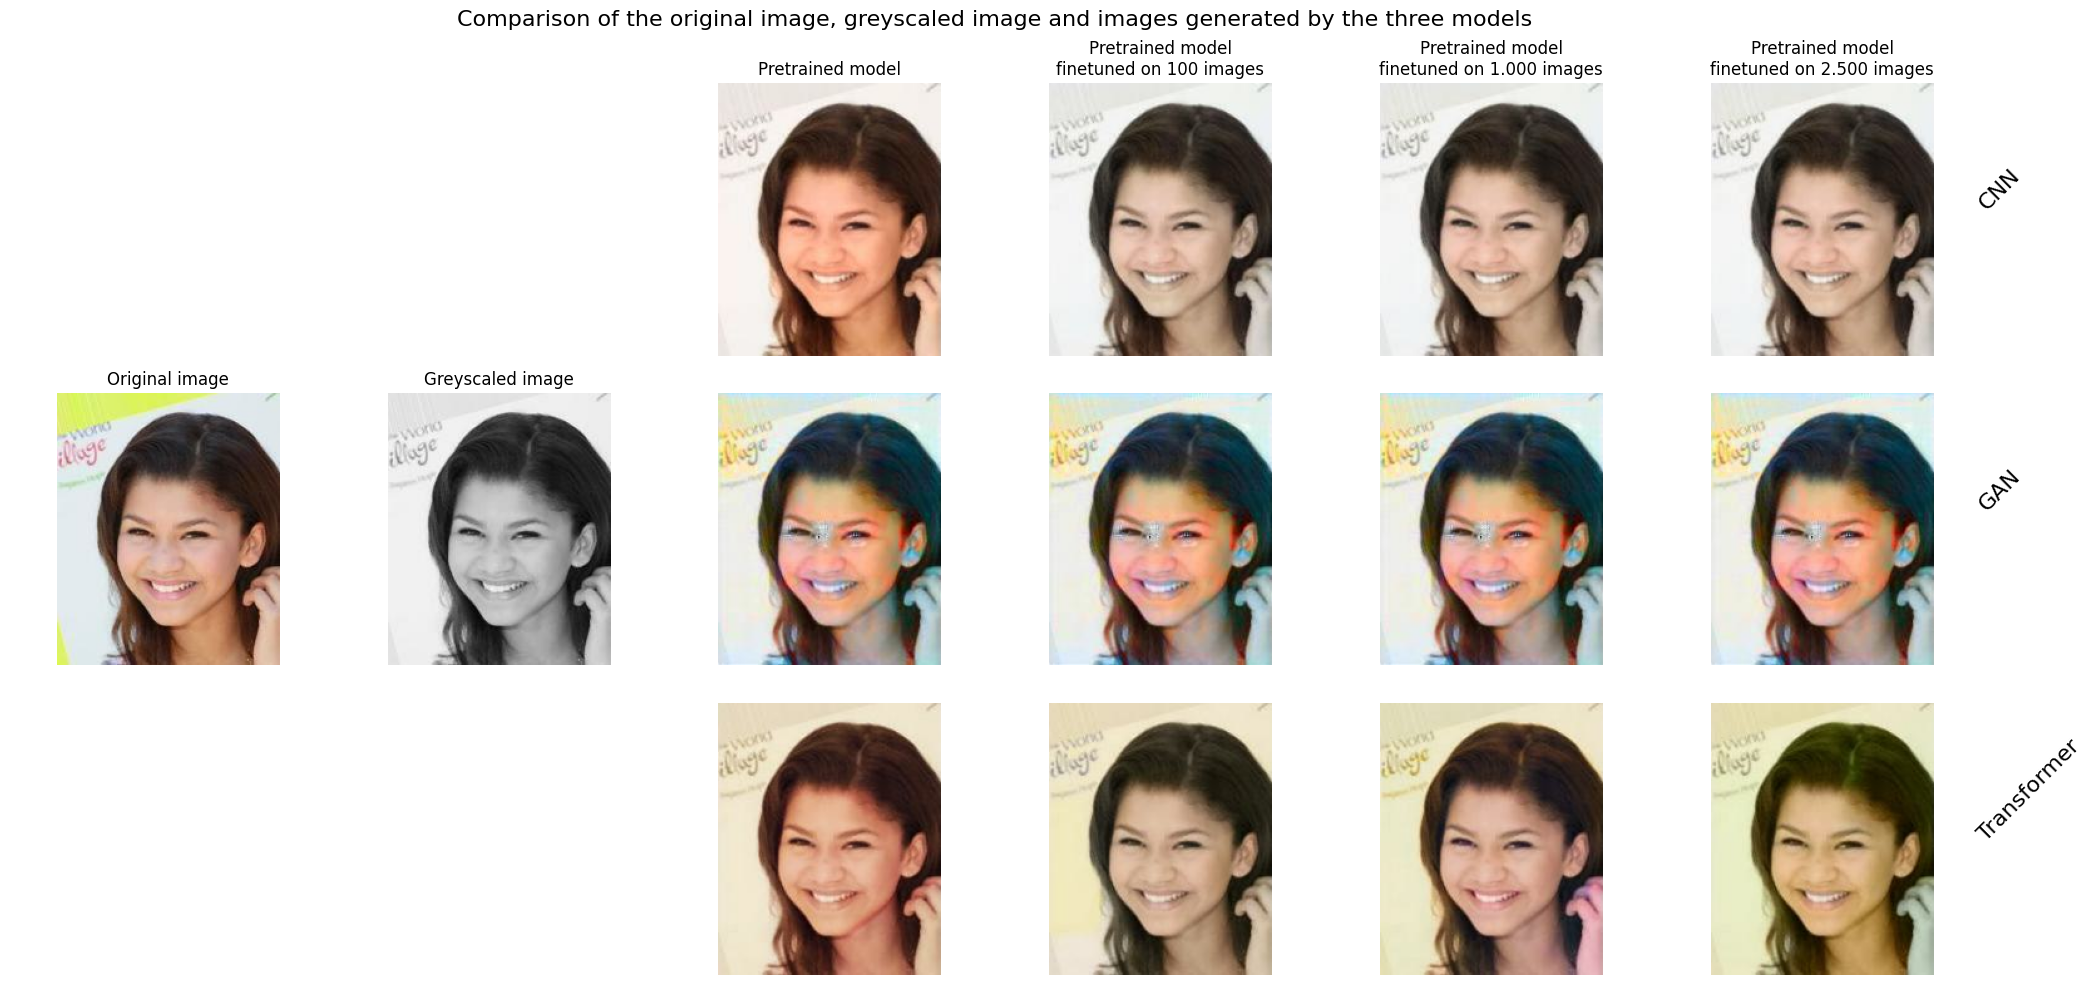

In [3]:
# Make plot with the original image, greyscaled image, image with the 100, 1000 and 2500 model

fig, axs = plt.subplots(3, 6, figsize=(20, 10), sharey=True, sharex=True)
fig.suptitle("Comparison of the original image, greyscaled image and images generated by the three models", fontsize=16)

axs[1, 0].imshow(images["original"])
axs[1, 0].set_title("Original image")
axs[1, 1].imshow(images["original_grey"])
axs[1, 1].set_title("Greyscaled image")
axs[0, 2].imshow(images["cnn_pretrained"])
axs[0, 2].set_title("Pretrained model")
axs[0, 3].imshow(images["cnn_100"])
axs[0, 3].set_title("Pretrained model\nfinetuned on 100 images")
axs[0, 4].imshow(images["cnn_1000"])
axs[0, 4].set_title("Pretrained model\nfinetuned on 1.000 images")
axs[0, 5].imshow(images["cnn_2500"])
axs[0, 5].set_title("Pretrained model\nfinetuned on 2.500 images")

# axs[1, 0].imshow(images["original"])
# axs[1, 1].imshow(images["original_grey"])
axs[1, 2].imshow(images["gan_pretrained"])
axs[1, 3].imshow(images["gan_100"])
axs[1, 4].imshow(images["gan_1000"])
axs[1, 5].imshow(images["gan_2500"])

# axs[2, 0].imshow(images["original"])
# axs[2, 1].imshow(images["original_grey"])
axs[2, 2].imshow(images["transformer_pretrained"])
axs[2, 3].imshow(images["transformer_100"])
axs[2, 4].imshow(images["transformer_1000"])
axs[2, 5].imshow(images["transformer_2500"])


# Disable axis
for ax in axs.flat:
    ax.axis("off")

plt.tight_layout()
# Show three texts for the three models on the right side, 45 degree rotated
fig.text(0.99, 0.8, "CNN", ha="left", va="center", fontsize=16, rotation=45)
fig.text(0.99, 0.5, "GAN", ha="left", va="center", fontsize=16, rotation=45)
fig.text(0.99, 0.2, "Transformer", ha="left", va="center", fontsize=16, rotation=45)

plt.savefig("./images/comparison.png", dpi=300)
plt.savefig("./images/comparison.eps", dpi=300)
plt.show()


In [4]:

import json

fp_jsons = "./results/gan/"
jsons = [os.path.join(fp_jsons, file) for file in os.listdir(fp_jsons)]

# Add all results together in dict, with the model name as key
results = {}
for file in jsons:
    with open(file, "r") as f:
        results[file.split("/")[-1].split(".")[0]] = json.load(f)

results.keys()


dict_keys(['100', '1000', '2500', 'pretrained'])

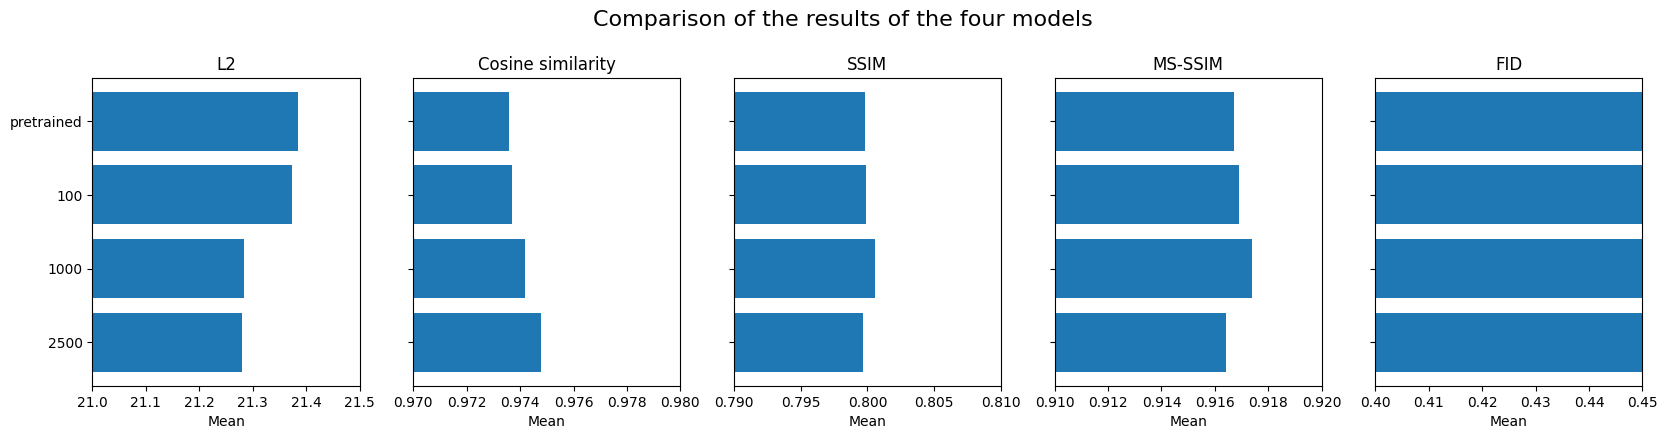

In [5]:
# Plot the results of the four models, based on their JSONs

fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
fig.suptitle("Comparison of the results of the four models", fontsize=16, y=1.05)

# Barplots
data_l2 = list(zip(*sorted(((key, value["L2"]["mean"]) for (key, value) in results.items()), key=lambda x: x[1])))
axs[0].barh(data_l2[0], data_l2[1])

data_cosine_similarity = list(zip(*sorted(((key, value["cosine_similarity"]["mean"])
                              for (key, value) in results.items()), key=lambda x: x[1])))
axs[1].barh(data_cosine_similarity[0], data_cosine_similarity[1])

data_ssim = list(zip(*sorted(((key, value["SSIM"]["mean"]) for (key, value) in results.items()), key=lambda x: x[1])))
axs[2].barh(data_ssim[0], data_ssim[1])

data_ms_ssim = list(zip(*sorted(((key, value["MS-SSIM"]["mean"]) for (key, value) in results.items()), key=lambda x: x[1])))
axs[3].barh(data_ms_ssim[0], data_ms_ssim[1])

data_fid = list(zip(*sorted(((key, value["FID"]["mean"]) for (key, value) in results.items()), key=lambda x: x[1])))
axs[4].barh(data_fid[0], data_fid[1])

axs[0].set_title("L2")
axs[1].set_title("Cosine similarity")
axs[2].set_title("SSIM")
axs[3].set_title("MS-SSIM")
axs[4].set_title("FID")

for ax in axs:
    ax.set_xlabel("Mean")

# Set xlims
axs[0].set_xlim(21, 21.5)
axs[1].set_xlim(0.97, 0.98)
axs[2].set_xlim(0.79, 0.81)
axs[3].set_xlim(0.91, 0.92)
axs[4].set_xlim(0.4, 0.45)

plt.show()

In [6]:
# Collect all results from the folder
fp_results = "./results/"

# Each subfolder is one model
models = [os.path.join(fp_results, model) for model in os.listdir(fp_results)]
models

# Add results of all json files of each model to a dict
results = {}
for model in models:
    results[model.split("/")[-1]] = {}

    for file in os.listdir(model):
        with open(os.path.join(model, file), "r") as f:
            results[model.split("/")[-1]][file.split(".")[0]] = json.load(f)

results.keys()

dict_keys(['cnn', 'gan', 'transformer'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


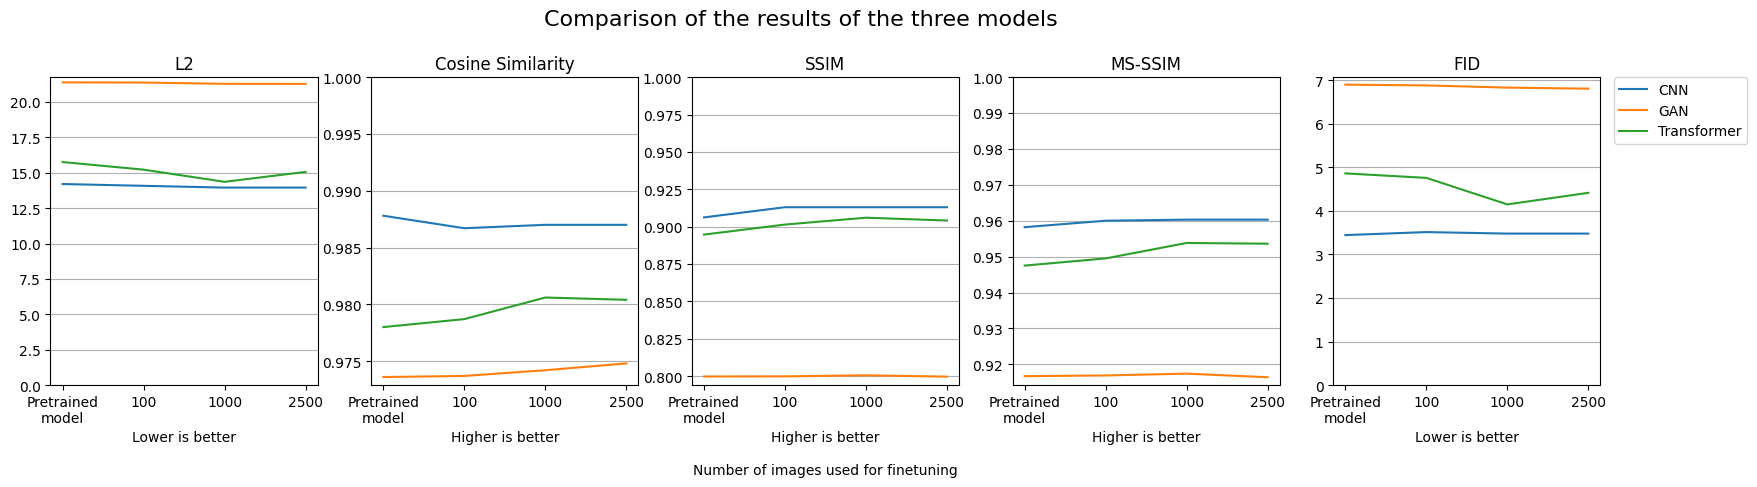

In [7]:
# Make lineplot of the results of the four models, based on their JSONs

fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharex=True)
fig.suptitle("Comparison of the results of the three models", fontsize=16, y=1.05)

# Lineplots, short in order {pretrained, 100, 1000, 2500}
order = {"pretrained": 0, "100": 1, "1000": 2, "2500": 3}
for c, statistic in enumerate(["L2", "cosine_similarity", "SSIM", "MS-SSIM", "FID"]):
    for model in results.keys():
        data = list(zip(*sorted(((key, value[statistic]["mean"]) for (key, value) in results[model].items()), key=lambda x: order[x[0]])))
        data[0] = ["Pretrained\nmodel" if x == "pretrained" else x for x in data[0]]  # Change the name of the pretrained model
        model = {"cnn": "CNN", "gan": "GAN", "transformer": "Transformer"}[model]
        axs[c].plot(data[0], data[1], label=model)

    if statistic == "cosine_similarity":
        statistic = "Cosine Similarity"
    axs[c].set_title(statistic)


axs[0].set_xlabel("Lower is better")
axs[1].set_xlabel("Higher is better")
axs[2].set_xlabel("Higher is better\n\nNumber of images used for finetuning")
axs[3].set_xlabel("Higher is better")
axs[4].set_xlabel("Lower is better")
axs[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Add limits
axs[0].set_ylim(0, None)
axs[1].set_ylim(None, 1)
axs[2].set_ylim(None, 1)
axs[3].set_ylim(None, 1)
axs[4].set_ylim(0, None)

for ax in axs:
    ax.grid(axis="y")

plt.savefig("./images/results.png", format="png", bbox_inches="tight", dpi=300)
plt.savefig("./images/results.eps", format="eps", bbox_inches="tight", dpi=300)
plt.show()